In [76]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import spacepy.time as spt
import spacepy.omni as om

In [102]:
# On charge une bonne période de données
ticks = spt.tickrange('1980-01-01T00:00:00', '2017-01-01T00:00:00', deltadays = 1./24.)
d = om.get_omni(ticks)

Kp = d['Kp']
Bz = d['BzIMF']
V  = d['velo']
N  = d['dens']
dates = d['ticks'].UTC
np.size(Kp)

324361

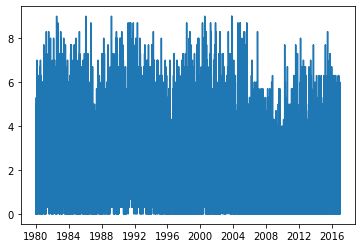

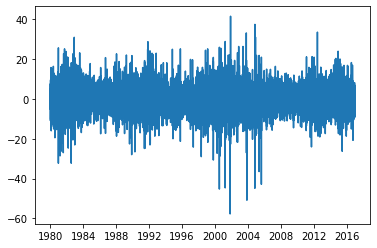

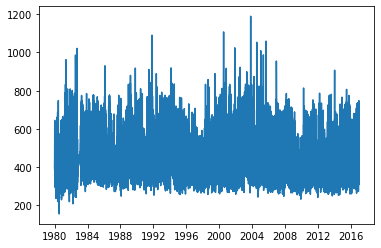

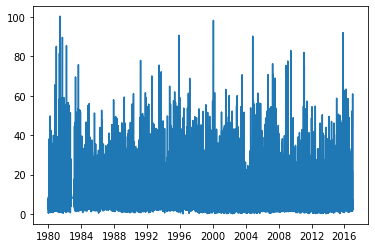

In [78]:
for d in (Kp, Bz, V, N):
    plt.figure()
    plt.plot(dates, d)

In [80]:
input_data = np.stack((Bz,V,N)).T
output_data = Kp[:,None]

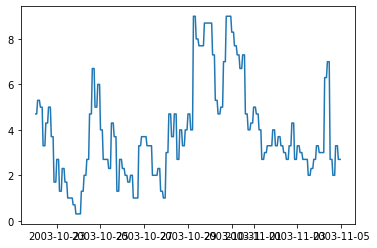

In [81]:
# Sélection d'une période de test:
from datetime import datetime
test_min, test_max = datetime(2003,10,22), datetime(2003,11,5)
in_test = np.logical_and(dates > test_min, dates < test_max)
train_index, = np.nonzero(np.logical_not(in_test))
test_index,  = np.nonzero(in_test)

X_train, X_test = input_data[train_index], input_data[test_index]
y_train, y_test = output_data[train_index], output_data[test_index]

plt.plot(dates[test_index], y_test)

In [100]:
SVR = svm.LinearSVR(max_iter=20)

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9551763196321937

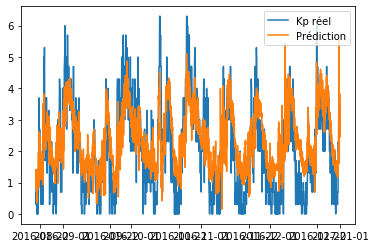

In [101]:
model = SVR.fit(X_train, y_train.ravel())

p_test = model.predict(X_test)
plt.plot(dates[test_index], y_test)
plt.plot(dates[test_index], p_test)
plt.legend(("Kp réel", "Prédiction"))
np.sqrt(mean_squared_error(y_test, p_test))

In [90]:
tss = TimeSeriesSplit(n_splits=100)
# Évaluation de l'erreur du model:
errors = []
m_dates = []
for train_index, test_index in tss.split(input_data, output_data):
    X_train, X_test = input_data[train_index], input_data[test_index]
    y_train, y_test = output_data[train_index], output_data[test_index]
    dates_test = dates[test_index]
    model_svm = SVR.fit(X_train, y_train.ravel())
    s_test = model_svm.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, s_test))
    errors.append(error)
    m_dates.append(dates_test[len(test_index)//2])
    #plt.figure()
    #plt.plot(dates_test, y_test)
    #plt.plot(dates_test, p_test)


C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

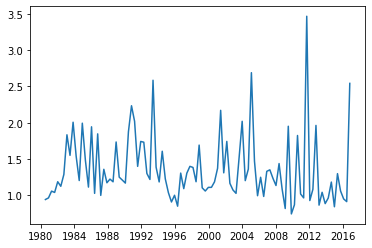

In [91]:
plt.plot(m_dates,errors)